In [140]:
URL = 'https://nnfs.io/datasets/fashion_mnist_images.zip'
FILE = 'fashion_mnist_images.zip'
FOLDER = 'fashion_mnist_images'

In [141]:
import os
from tqdm import tqdm

In [142]:
files = os.listdir('fashion_mnist_images/train/0')
print(files[:10])
print(len(files))

['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png']
6000


In [143]:
import numpy as np
np.set_printoptions(linewidth=200)
import cv2
image_data = cv2.imread('fashion_mnist_images/train/3/0002.png',
cv2.IMREAD_UNCHANGED)
print(image_data)



[[  0   0   0   0   0   0   0   0   0   0   0  14   0   0   0   0  51   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 139 214 218 220 164 206 243 233 205  93   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 130 253 225 226 233 229 232 230 219 227 249  63   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 203 237 221 222 221 222 219 220 224 218 233 191   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 232 237 224 225 224 224 222 221 225 218 224 253   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 232 223 225 222 221 219 216 219 212 223 255  30   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   5 255 230 224 221 223 218 219 217 221 214 229 255  89   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  32 255 228 221 220 223 221 221 218 217 221 232 255 113   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  78 255 227 218 220 221 226 225 219 215 232 168 25

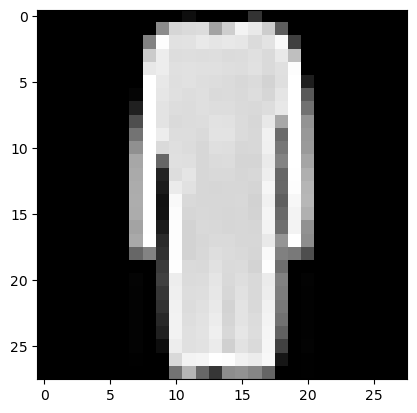

In [144]:
import matplotlib.pyplot as plt
plt.imshow(image_data,cmap='gray')

In [145]:
labels = os.listdir('fashion_mnist_images/train/')
labels

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [146]:
def load_data(dataset,path):
    X = []
    y = []

    for label in tqdm(labels):
        for file in os.listdir(os.path.join(path,dataset,label)):
            if(file[0] == '.'):
                continue
            img = cv2.imread(os.path.join(path,dataset,label,file),cv2.IMREAD_UNCHANGED)
            X.append(img)
            y.append(label)
    X = np.array(X)
    y = np.array(y).astype('uint8')
    
    return X,y

In [147]:
PATH = "fashion_mnist_images/"

X,y = load_data("train",PATH)
X_test,y_test = load_data("test",PATH)


100%|██████████| 10/10 [00:01<00:00,  5.26it/s]


# Data preprocessing

In [148]:
# Scaling the data between -1 and 1

X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5


In [149]:
X.min(),X.max()

(-1.0, 1.0)

In [150]:
print("X shape : ",X.shape," X_test shape : ",X_test.shape)

X shape :  (60000, 28, 28)  X_test shape :  (10000, 28, 28)


In [151]:
# Converting the 2D array of features into a 1D array
X = X.reshape(X.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

print("X shape : ",X.shape," X_test shape : ",X_test.shape)

X shape :  (60000, 784)  X_test shape :  (10000, 784)


In [182]:
# Shuffling the data

idxs = np.array(range(X.shape[0]))

np.random.shuffle(idxs)

X = X[idxs]
y = y[idxs]

test_idxs = np.array(range(X_test.shape[0]))
np.random.shuffle(test_idxs)

X_test = X_test[test_idxs]
y_test = y_test[test_idxs]

In [183]:
y[:10]

array([8, 9, 0, 2, 7, 8, 0, 3, 5, 0], dtype=uint8)

In [184]:
class Dense_Layer:
    def __init__(self,ninputs,nneurons,l1_w=0,l1_b=0,l2_w=0,l2_b=0):
        # Initialising weights and biases
        self.weights = 0.01 * np.random.randn(ninputs,nneurons)
        self.biases = np.zeros((1,nneurons))
        # Regularization
        self.l1_w = l1_w
        self.l1_b = l1_b
        self.l2_w = l2_w
        self.l2_b = l2_b
        
    # Forward Propagation    
    def forward(self,inputs,training):
        self.output = np.dot(inputs,self.weights) + self.biases
        self.inputs = inputs
    
    # Backpropagation
    def backward(self,dvalues):
        self.dinputs = np.dot(dvalues,self.weights.T)
        self.dweights = np.dot(self.inputs.T,dvalues)
        self.dbiases = np.sum(dvalues,axis=0,keepdims=True)
        
        if self.l1_w > 0:
            dl1w = np.ones_like(self.weights)
            dl1w[self.weights < 0] = -1
            self.dweights += dl1w
        if self.l1_b > 0:
            dl1b = np.ones_like(self.biases)
            dl1b[self.biases < 0] = -1
            self.dbiases += sl1b
        if self.l2_w > 0:
            self.dweights += self.weights * 2 * self.l2_w
        if self.l2_b > 0:
            self.dbiases += self.biases * 2 * self.l2_b
            

class Dropout_layer:
    def __init__(self,drop_rate=0):
        self.drop_rate = 1 - drop_rate
    def forward(self,inputs,training):
        if not training:
            self.output = input.copy()
            return
        self.dropmask = np.random.binomial(1,self.drop_rate,size =inputs.shape)/(self.drop_rate)
        self.output = inputs * self.dropmask
    def backward(self,dvalues):
        self.dinputs = dvalues * self.dropmask
        
class Activation_Relu:
    def forward(self,inputs,training):
        self.output = np.maximum(0,inputs)
        self.inputs = inputs
    
    def backward(self,dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0
        
class Activation_Sigmoid:
    def forward(self,inputs,training):
        self.inputs= inputs
        self.outputs = 1/(1+np.exp(-inputs))
    def backward(self,dvalues):
        self.dinputs = dvalues * self.outputs * (1 - self.outputs)
        
class Loss_BinaryCrossentropy():
    def calculate(self, output, y):
        # Calculate sample losses
        sample_losses = self.forward(output, y)
        # Calculate mean loss
        data_loss = np.mean(sample_losses)
        # Return loss
        return data_loss

    def regularization_loss(self):
        
        loss = 0
        for layer in self.trainable_layers:
            if layer.l1_w > 0:
                loss += layer.l1_w * np.sum(np.abs(layer.weights))
            if layer.l1_b > 0:
                loss += layer.l1_b * np.sum(np.abs(layer.biases))
            if layer.l2_w > 0:
                loss += layer.l2_w * np.sum(layer.weights * layer.weights)
            if layer.l2_b > 0:
                loss += layer.l2_b * np.sum(layer.biases * layer.biases)
        
        return loss
    
    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers
    
    # Forward pass
    def forward(self, y_pred, y_true):
        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        # Calculate sample-wise loss
        sample_losses = -(y_true * np.log(y_pred_clipped) +
        (1 - y_true) * np.log(1 - y_pred_clipped))
        sample_losses = np.mean(sample_losses, axis=-1)
        # Return losses
        return sample_losses
        # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])
        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        clipped_dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)
        # Calculate gradient
        self.dinputs = -(y_true / clipped_dvalues -
        (1 - y_true) / (1 - clipped_dvalues)) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples
        
class Activation_Softmax:
    def forward(self,inputs,y_true):
        expvals = np.exp(inputs - np.max(inputs, axis=1,
        keepdims=True) )
        self.output = expvals/np.sum(expvals,axis=1,keepdims=True)
        
    def predictions(self, outputs):
        return np.argmax(outputs, axis=1)
    

class CrossEntropyLoss:
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)
        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
            range(samples),
            y_true
            ]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
            y_pred_clipped * y_true,
            axis=1
            )
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
    
    def calculate_accumulated(self,*,regularization=False):
        data_loss = self.accumulated_sum / self.accumulated_count
        if not regularization:
            return data_loss
        return data_loss,self.regularization_loss()
    
    def calculate(self, output, y, *, regularization=False):
        # Calculate sample losses
        sample_losses = self.forward(output, y)
        # Calculate mean loss
        data_loss = np.mean(sample_losses)
        
        self.accumulated_sum += np.sum(sample_losses)
        self.accumulated_count += len(sample_losses)

        # If just data loss - return it
        if not regularization:
            return data_loss
        # Return the data and regularization losses
        return data_loss, self.regularization_loss()
        
        return np.mean(-np.log(y_pred[range(len(y_pred)),y_true]))
    def regularization_loss(self):
        
        loss = 0
        for layer in self.trainable_layers:
            if layer.l1_w > 0:
                loss += layer.l1_w * np.sum(np.abs(layer.weights))
            if layer.l1_b > 0:
                loss += layer.l1_b * np.sum(np.abs(layer.biases))
            if layer.l2_w > 0:
                loss += layer.l2_w * np.sum(layer.weights * layer.weights)
            if layer.l2_b > 0:
                loss += layer.l2_b * np.sum(layer.biases * layer.biases)
        
        return loss
    
    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers
        
    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0
        
        
class Activation_softmax_cross_entropy:
#     def __init__(self):
#         self.activation = Activation_Softmax()
#         self.lossfunc = CrossEntropyLoss()
    
#     def forward(self,inputs,y_true):
#         self.activation.forward(inputs,y_true)
#         self.output = self.activation.output
#         return self.lossfunc.calculate(self.output,y_true)
    
    def backward(self,dvalues,y_true):
        samples = len(y_true)
        
        # Turning one hot encoded arrays to sparse vectors
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true,axis=1)
        
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples),y_true] -= 1
        
        self.dinputs/=samples
        
        
class Adam_Optimizer:
    def __init__(self,lr=0.001,decay_rate=0,epsilon= 1e-7,beta1=0.9,beta2=0.999):
        self.initiallr = lr
        self.currentlr = lr
        self.decay_rate = decay_rate
        self.iterations = 0
        self.epsilon = epsilon
        self.beta1 = beta1
        self.beta2 = beta2
    
    def pre_update(self):
        self.currentlr = self.initiallr * (1/(1+(self.decay_rate * self.iterations)))

    def update_params(self,layer):
        
        if not hasattr(layer,'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
            layer.weight_momentum = np.zeros_like(layer.weights)
            layer.bias_momentum = np.zeros_like(layer.biases)
            
        layer.weight_momentum = self.beta1 * layer.weight_momentum + (1-self.beta1) * layer.dweights
        layer.bias_momentum = self.beta1 * layer.bias_momentum + (1 - self.beta1) * layer.dbiases
        
        layer.weight_momentum_prime = layer.weight_momentum / (1 - self.beta1 ** (self.iterations + 1))
        layer.bias_momentum_prime = layer.bias_momentum / (1 - self.beta1 ** (self.iterations + 1))
        
        layer.weight_cache = layer.weight_cache * self.beta2 + (1-self.beta2) * (layer.dweights ** 2)
        layer.bias_cache = layer.bias_cache * self.beta2 + (1-self.beta2) * (layer.dbiases ** 2)
        
        layer.weight_cache_prime = layer.weight_cache / (1 - self.beta2 ** (self.iterations + 1))
        layer.bias_cache_prime = layer.bias_cache / (1 - self.beta2 ** (self.iterations + 1))

        layer.weights += - self.currentlr * layer.weight_momentum_prime  / (np.sqrt(layer.weight_cache_prime) + self.epsilon)
        layer.biases += -self.currentlr * layer.bias_momentum_prime / (np.sqrt(layer.bias_cache_prime) + self.epsilon)
        
    def post_update(self):
        self.iterations += 1
        
        
class Model:
    def __init__(self):
        self.layers = []
        self.softmax_classifier_output = None
    
    def add(self,layer):
        self.layers.append(layer)
        
    def set(self,*,loss,optimizer,accuracy):
        self.loss = loss
        self.optimizer = optimizer
        self.accuracy = accuracy
    
    def train(self,X,y,*,epochs,print_every,validation_data = None,batch_size = None):
        self.accuracy.init(y)
        
        train_steps = 1
        
        if validation_data is not None:
            validation_steps = 1
            X_val,y_val = validation_data
        
        if batch_size is not None:
            train_steps = len(X) // batch_size
            
            if train_steps * batch_size < len(X):
                train_steps += 1
                
            if validation_data is not None:
                validation_steps = len(X_val) // batch_size
                
                if validation_steps * batch_size < len(X_val):
                    validation_steps += 1
                
        
        for epoch in range(1,epochs+1):
            
            print("Epoch : ",epoch)
            
            self.loss.new_pass()
            self.accuracy.new_pass()
            
            for step in range(train_steps):
                
                if batch_size is None:
                    batch_X = X
                    batch_y = y
                else:
                    batch_X = X[step * batch_size : (step+1) * batch_size]
                    batch_y = y[step * batch_size : (step+1) * batch_size]

                    
                output = self.forward(batch_X,training = True)
                data_loss,regularization_loss = self.loss.calculate(output,batch_y,regularization=True)
                loss = data_loss + regularization_loss

                predictions = self.output_activation.predictions(output)

                accuracy = self.accuracy.calculate(predictions,batch_y)

                self.backward(output,batch_y)

                self.optimizer.pre_update()
                for layer in self.trainable_layers:
                    self.optimizer.update_params(layer)
                self.optimizer.post_update

                if not step % print_every or step == train_steps - 1:
                    print(f'iteration: {step}, ' +
                    f'acc: {accuracy:.3f}, ' +
                    f'loss: {loss:.3f} (' +
                    f'data_loss: {data_loss:.3f}, ' +
                    f'reg_loss: {regularization_loss:.3f}), ' +
                    f'lr: {self.optimizer.currentlr}')
            
            epoch_accuracy = self.accuracy.calculate_accumulated()
            epoch_data_loss, epoch_regularization_loss = self.loss.calculate_accumulated(regularization=True)
            epoch_loss = epoch_data_loss + epoch_regularization_loss
            
            print(f'training, ' +
                    f'acc: {epoch_accuracy:.3f}, ' +
                    f'loss: {epoch_loss:.3f} (' +
                    f'data_loss: {epoch_data_loss:.3f}, ' +
                    f'reg_loss: {epoch_regularization_loss:.3f}), ' +
                    f'lr: {self.optimizer.currentlr}')

            
            
        if validation_data is not None:
            
            self.accuracy.new_pass()
            self.loss.new_pass()
            
            for step in range(validation_steps):
                if batch_size is None:
                    batch_X = X_val
                    batch_y = y_val
                else:
                    batch_X = X_val[step * batch_size : (step + 1) * batch_size]
                    batch_y = y_val[step * batch_size : (step + 1) * batch_size]
                    
            
            output = self.forward(batch_X,training=False)
            loss = self.loss.calculate(output, batch_y)
            predictions = self.output_activation.predictions(
            output)
            accuracy = self.accuracy.calculate(predictions, batch_y)
            validation_accuracy = self.accuracy.calculate_accumulated()
            validation_loss = self.loss.calculate_accumulated()
            print(f'validation, ' +
            f'acc: {validation_accuracy:.3f}, ' +
            f'loss: {validation_loss:.3f}')

        
    def finalize(self):
        self.input_layer = Input_Layer()
        self.trainable_layers = []
        nlayers = len(self.layers)
        
        for i in range(nlayers):
            if i==0 :
                self.layers[i].prev = self.input_layer
                self.layers[i].next = self.layers[i+1]
            elif i < nlayers - 1:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.layers[i+1]
            else:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.loss
                self.output_activation = self.layers[i]
            
            if hasattr(self.layers[i],"weights"):
                self.trainable_layers.append(self.layers[i])
        self.loss.remember_trainable_layers(self.trainable_layers)   
        
        if isinstance(self.layers[-1], Activation_Softmax) and \
        isinstance(self.loss, CrossEntropyLoss):
            self.softmax_classifier_output = \
            Activation_softmax_cross_entropy()

            
    def forward(self,X,training):
        self.input_layer.forward(X)
        for layer in self.layers:
            layer.forward(layer.prev.output,training)
        return layer.output
    def backward(self,output,y):
        
        if self.softmax_classifier_output is not None:
            self.softmax_classifier_output.backward(output, y)
            self.layers[-1].dinputs = \
            self.softmax_classifier_output.dinputs
            for layer in reversed(self.layers[:-1]):
                layer.backward(layer.next.dinputs)
            return
        
        
        self.loss.backward(output,y)
        
        for layer in reversed(self.layers):
            layer.backward(layer.next.dinputs)
        
class Input_Layer:
    def forward(self,inputs):
        self.output = inputs
        
class Accuracy:
    def calculate(self,predictions,y):
        comparisions = self.compare(predictions,y)
        accuracy = np.mean(comparisions)
        self.accumulated_sum += accuracy
        self.accumulated_count += 1
        return accuracy
    
    def calculate_accumulated(self):
        accuracy = self.accumulated_sum / self.accumulated_count
        return accuracy
    
    def new_pass(self):
        self.accumulated_count = 0
        self.accumulated_sum = 0
    
class Accuracy_Regression(Accuracy):
    def __init__(self):
        self.precision = None
        
    def init(self, y, reinit=False):
        if self.precision is None or reinit:
            self.precision = np.std(y) / 250

    def compare(self, predictions, y):
        return np.absolute(predictions - y) < self.precision

class Accuracy_Classification(Accuracy):
    def init(self,y):
        pass
    def compare(self,predictions,y):
        if len(y.shape) == 2:
            y = np.argmax(y,axis=1)
        return np.mean(predictions == y)

In [236]:
model = Model()
model.add(Dense_Layer(784,256))
model.add(Activation_Relu())
model.add(Dense_Layer(256,256))
model.add(Activation_Relu())
model.add(Dense_Layer(256,10))
model.add(Activation_Softmax())

model.set(accuracy=Accuracy_Classification(),loss=CrossEntropyLoss(),optimizer=Adam_Optimizer(decay_rate=1e-3))

model.finalize()

model.train(X,y,batch_size=128,epochs=5,print_every=100,validation_data=(X_test,y_test))

Epoch :  1
iteration: 0, acc: 0.078, loss: 2.303 (data_loss: 2.303, reg_loss: 0.000), lr: 0.001
iteration: 100, acc: 0.773, loss: 0.549 (data_loss: 0.549, reg_loss: 0.000), lr: 0.001
iteration: 200, acc: 0.812, loss: 0.537 (data_loss: 0.537, reg_loss: 0.000), lr: 0.001
iteration: 300, acc: 0.820, loss: 0.521 (data_loss: 0.521, reg_loss: 0.000), lr: 0.001
iteration: 400, acc: 0.828, loss: 0.368 (data_loss: 0.368, reg_loss: 0.000), lr: 0.001
iteration: 468, acc: 0.885, loss: 0.298 (data_loss: 0.298, reg_loss: 0.000), lr: 0.001
training, acc: 0.794, loss: 0.555 (data_loss: 0.555, reg_loss: 0.000), lr: 0.001
Epoch :  2
iteration: 0, acc: 0.844, loss: 0.415 (data_loss: 0.415, reg_loss: 0.000), lr: 0.001
iteration: 100, acc: 0.914, loss: 0.320 (data_loss: 0.320, reg_loss: 0.000), lr: 0.001
iteration: 200, acc: 0.852, loss: 0.408 (data_loss: 0.408, reg_loss: 0.000), lr: 0.001
iteration: 300, acc: 0.852, loss: 0.449 (data_loss: 0.449, reg_loss: 0.000), lr: 0.001
iteration: 400, acc: 0.906, los

In [237]:
pred = model.forward(X_test,training=False)

In [238]:
pred = np.argmax(pred,axis=1)

In [239]:
np.mean(pred == y_test)

0.8649

In [240]:
results = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

In [246]:
def plot_images_with_predictions(images, predictions, num_rows=1, num_cols=5):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"Prediction: {predictions[i]}")
        ax.axis('off')
    plt.show()


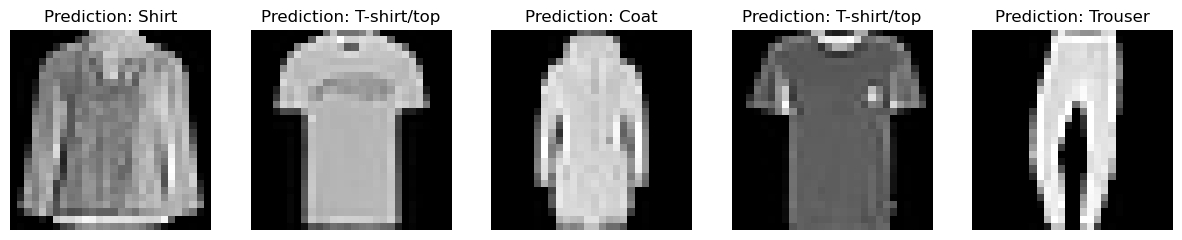

In [249]:
X_display = X_test[1:6]
predictions_display = [results[pred[i]] for i in range(1,6)]
plot_images_with_predictions(X_display, predictions_display)
